In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import healpy as hp

In [2]:
# Set the database and query
database = 'minion_1016_sqlite.db'
#sqlWhere = 'filter = "r" and night < 400'
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'
resultsDb = db.ResultsDb(outDir=outDir)
nside=512


In [3]:
bundleList = []
sql = 'filter = "r" and night < 400 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
slicer = slicers.HealpixSlicer(nside=nside, latLonDeg=False)
metric = metrics.CountMetric('expMJD')

bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database Summary with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0 for columns ['fieldRA', 'expMJD', 'fieldDec']
Found 290 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_400_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0" constraint now.
monopole: -191.897  dipole: lon: 6.80495, lat: -7.64339, amp: 205.161
Plotting complete.


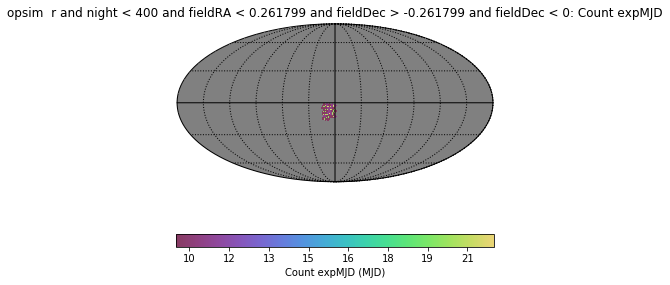

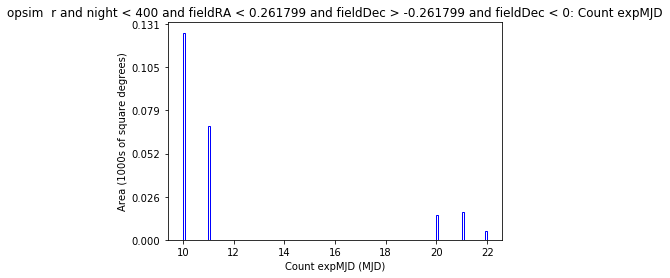

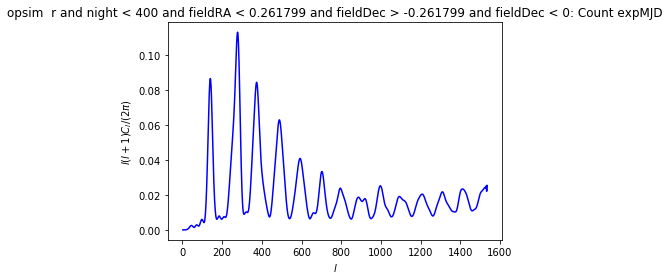

In [5]:
bgroup.plotAll(closefigs=False)

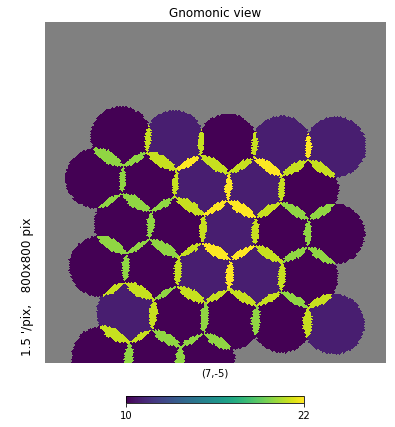

In [6]:
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))
plt.savefig('default.png')

In [7]:
tot_pix_counts_full = np.sum(bundleList[0].metricValues)

In [8]:
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, latLonDeg=False, mjdColName='expMJD')
bundleList = []
bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


Querying database Summary with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0 for columns ['fieldRA', 'expMJD', 'rotSkyPos', 'fieldDec']
Found 290 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_400_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


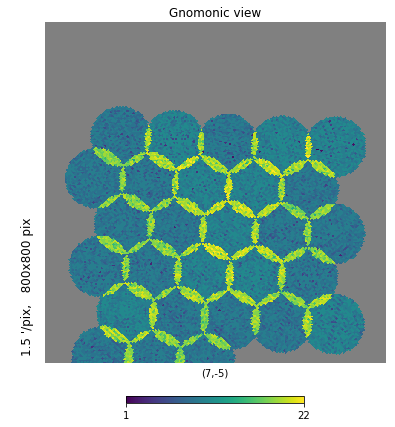

In [9]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))
plt.savefig('with_camera.png')

In [10]:
tot_pix_counts_camera = np.sum(bundleList[0].metricValues)

In [11]:
fill_factor = tot_pix_counts_camera/tot_pix_counts_full
print('Camera fill factor = %f' % fill_factor)

Camera fill factor = 0.909923


In [12]:
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=2., latLonDeg=False, mjdColName='expMJD')
bundleList = []
bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


Querying database Summary with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0 for columns ['fieldRA', 'expMJD', 'rotSkyPos', 'fieldDec']
Found 290 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_400_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


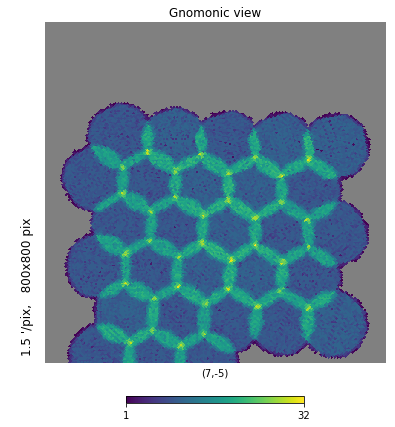

In [13]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))
plt.savefig('camera_all_chips.png')

In [18]:
bundleList = []
slicer = slicers.HealpixSlicer(nside=1024, useCamera=True, radius=2., latLonDeg=False, mjdColName='expMJD')
#sql = 'filter = "r" and night < 204 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
sql = 'filter = "r" and expMJD < 59783.3 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes


Querying database Summary with constraint filter = "r" and expMJD < 59783.3 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0 for columns ['fieldRA', 'expMJD', 'rotSkyPos', 'fieldDec']
Found 4 visits
Running:  ['opsim_Count_expMJD_r_and_expMJD_lt_59783_3_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


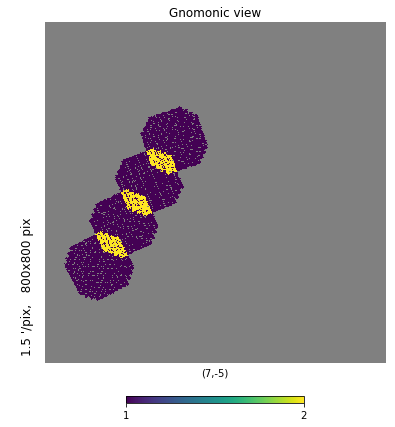

In [19]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))
plt.savefig('camera_large_few.png')

Plotting figures with "filter = "r" and expMJD < 59783.3 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: -44.4622  dipole: lon: 11.6666, lat: -5.57632, amp: 45.6576
Plotting complete.


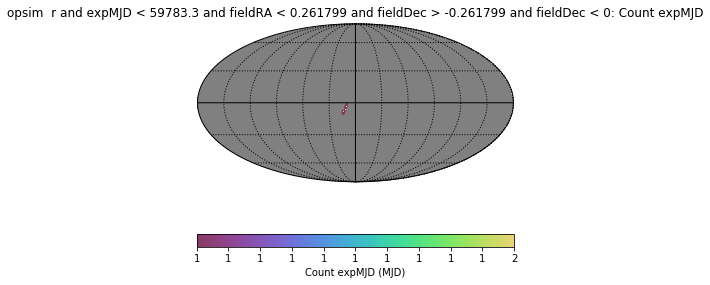

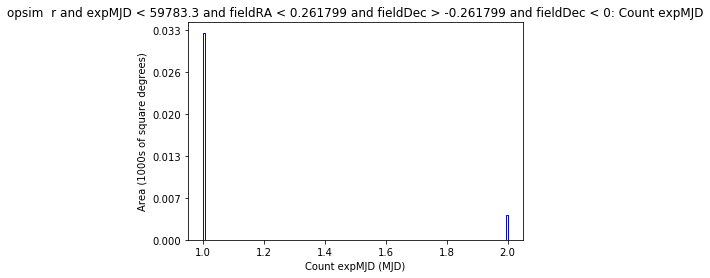

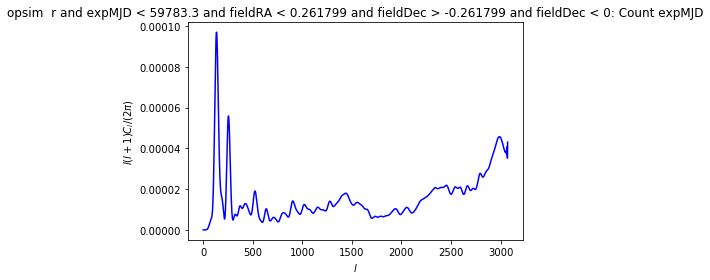

In [20]:
bgroup.plotAll(closefigs=False)

In [22]:
print('pixels over 0', np.where(bundleList[0].metricValues > 0)[0].size)
print('pixels over 1', np.where(bundleList[0].metricValues > 1)[0].size)


pixels over 0 11070
pixels over 1 1200


In [23]:
bundleList[0].metricValues.sum()/4.

3067.5

In [24]:
(959./4.)/2886.5

0.08305906807552399

In [25]:
189.*.083

15.687000000000001